Phys165 - Fall 2019 <br>
Lab 2 - The Z Boson Width: <br>
Data compared to simulation (i.e. Monte Carlo) <br>
Author: "Evan Shipley" <br>
Date: 10/15/2019

Make sure to look over the powerpoint slides on the ELMS homepage for a complete description of the problem.

You are asked to read in the data file 'Lab2_data.npz' similar to how you did in homework 4, problem 2. You can look at the 'keys' in the file using the function Array_name.files and print the 'descrition' key element as print(Array_name\['descrition'])



The data file contains "event data" from a hypothetical experiment that measures the electron and positron energies and momenta in a particle detector from the decay $Z \rightarrow e^+ \; e^-$

What you will do: <br>
1) You are to take those measured values from the detector data and reconstruct the invariant mass using the highlighted equation in the slides: <br>
$m_z^2 = 2(E_1E_2-\vec{p}_1 \cdot \vec{p}_2)$ <br>
2) Generate 100,000 simulated events that produce the same quantities as in the data (i.e. E,Px,Py,Pz) for the electron and positron<br>
3) make histogram distributions as 2x2 subplots for the electron. If you are using my histo routine include errorbars that are the sqrt(n in bin), which is the default. Also, include on the same 4 subplots the distributions from your Monte Carlo simulation (note: in the slides it talks about how to do this properly) <br>
4) do the same set of 2x2 subplots for the positron, data and MC <br>
5) Make a third figure that shows a histogram of the reconstructed Z mass for both the data(with error bars) and MC as a line (again see the note in the slides on how to do this)<br>
6) put the $\chi_\nu^2$ and Probability on the plot. Note: you'll have to change the chi-squared function to ignore bins with $ N_{Data}=0$, and therefore $\sigma = \sqrt{N_{Data}}=0$ to avoid divide by zero errors!

NOTE: As is described in the slides; for the Monte Carlo simulation you must also smear the electron and positron energies by the detector energy measurement resolution



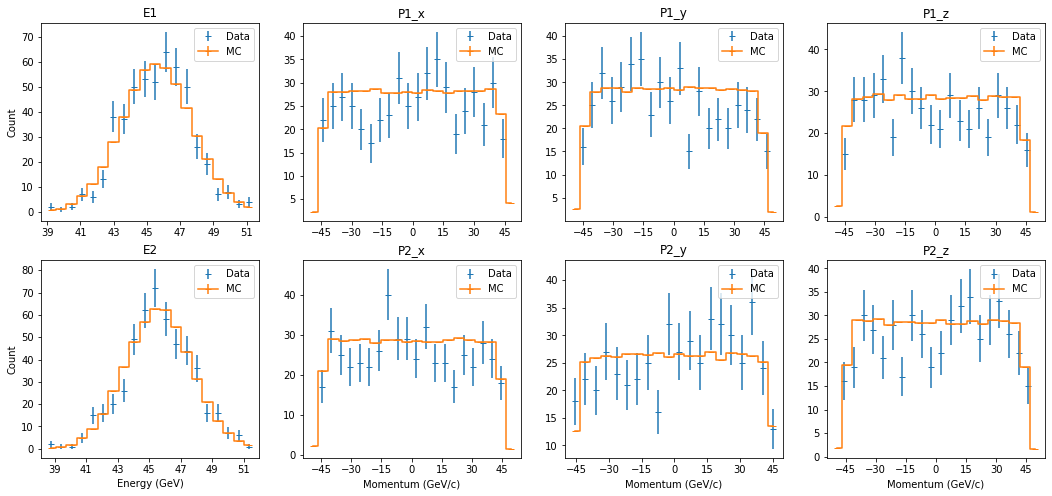

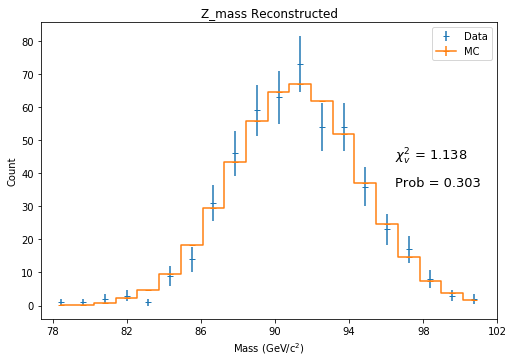

In [85]:
"""
Phys 165-F19 Lab 2
Collider experiment to produce Z bosons and then decay them via
Z --> e+ e- and uses measure electron-positron pair to 
reconstruct Z mass and width

Program to 
1) read in event data from file 'Lab2_data.npz'
and plot particle measurements
2) Simulate the particles in the detector for comparison
"""
#standard library modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#need this for chi**2 probability
import scipy.stats as st

# your code here...
def histo(x, n_bins=10, bmin='default' , bmax='default', 
          error='sqrt',style = 'point',ymin='auto',
          weight=1.0,label=''):

    """
    This routine draws a custom hostogram with errorbars
    Inputs:
        x = array of data points to be hostogrammed
        n_bins = number of bins in histogram. default=10
        b_min = value for lowest bin. default=min(x)
        b_max = value of high edge bin. default=max(x)
        error = text string of what kind of error bar. default='sqrt'
        style = string of what style. point(default) is points, bar is bar
        ymin = lower value for y-axis. default=auto
        weight = weight event counts by weight (default=1.) to
                allow normalizing 2 plots together
    Returns:
        array of length n_bins with number in each bin
        array of length n_bins with value of bin center
        array of length n_bins with values for error bars
    """
    if bmin == 'default':
        bmin = x.min()
    if bmax == 'default' :
        bmax=x.max()
    
    b_range = (bmin,bmax)
    y, bin_edges = np.histogram(x, bins=n_bins, range=b_range)
    bin_centers = 0.5*(bin_edges[1:] + bin_edges[:-1])

    y_err=np.sqrt(y)
    if error == 'sqrt' :
        y_err=y_err
    elif error == 'none':
        y_err=np.zeros(np.size(y))
    else:
        y_err=np.zeros(np.size(y))

    if ymin != 'auto':
        plt.ylim(ymin,1.1*(y.max()+y_err.max()))

    if style == 'point' :
        plt.errorbar(bin_centers, y*weight, yerr = y_err, 
                     marker='_',linestyle='None',
                    label=label)
    elif style == 'bar':
        plt.errorbar(bin_centers, y*weight, yerr = y_err ,
                     marker = '_', drawstyle = 'steps-mid',
                    label=label)
        
        
    return y, bin_centers,y_err

#Part 1 (data)
Data = np.load('Lab2_data.npz')
E1 = Data['E1']
E2 = Data['E2']
P1_x = Data['P1_x']
P1_y = Data['P1_y']
P1_z = Data['P1_z']
P2_x = Data['P2_x']
P2_y = Data['P2_y']
P2_z = Data['P2_z']
#P1=[P1_x,P1_y,P1_z]
#P2=[P2_x,P2_y,P2_z]
zm2=2*(E1*E2-P1_x*P2_x-P1_y*P2_y-P1_z*P2_z)

#Part 2 (Monte Carlo)
def Monte():
    Z_mass_mean = 91.1876
    Z_mass_sigma = 2.4952
    Z_mass = 91.1876 + 2.4952*np.random.randn(100000)
    E1_decay=Z_mass/2
    E2_decay=Z_mass/2
    E1_s=E1_decay+0.25*np.sqrt(E1_decay)*np.random.randn(100000)
    E2_s=E2_decay+0.25*np.sqrt(E2_decay)*np.random.randn(100000)
    phi_1=2*np.pi*np.random.random(100000)
    cosθ=-1+2*np.random.random(100000)
    sinθ=np.sqrt(1-cosθ**2)
    phi=2*np.pi*np.random.random(100000)

    P1X=E1_s*sinθ*np.cos(phi)
    P1Y=E1_s*sinθ*np.sin(phi)
    P1Z=E1_s*cosθ
    P2X=-E2_s*sinθ*np.cos(phi)
    P2Y=-E2_s*sinθ*np.sin(phi)
    P2Z=-E2_s*cosθ
    zm2_s=2*(E1_s*E2_s-P1X*P2X-P1Y*P2Y-P1Z*P2Z)

    
    return E1_s,E2_s,P1X,P1Y,P1Z,P2X,P2Y,P2Z,zm2_s
E1_s,E2_s,P1X,P1Y,P1Z,P2X,P2Y,P2Z,zm2_s=Monte()

weight=np.size(E1)/100000
'''j = 0
while j < 10:
    Monte()
    j += 1'''

#Plotting Part 1 & 2
f = plt.figure(figsize=(18,8))
plt.subplots_adjust(hspace = .2)
f.add_subplot(241)
histo(E1,20,bmin=min(E1),bmax=max(E1),label='Data')
histo(E1_s,20,bmin=min(E1),bmax=max(E1),style='bar',weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(E1)),np.around(max(E1)+2),2))
plt.title('E1')
plt.ylabel('Count')
plt.legend()
f.add_subplot(242)
histo(P1_x,20,bmin=min(P1_x),bmax=max(P1_x),label='Data')
histo(P1X,20,bmin=min(P1X),bmax=max(P1X),style='bar',weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(P1_x)+1),np.around(max(P1_x)+3),15))
plt.title('P1_x')
plt.legend()
f.add_subplot(243)
histo(P1_y,20,bmin=min(P1_y),bmax=max(P1_y),label='Data')
histo(P1Y,20,bmin=min(P1Y),bmax=max(P1Y),style='bar',weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(P1_x)+1),np.around(max(P1_x)+3),15))
plt.title('P1_y')
plt.legend()
f.add_subplot(244)
histo(P1_z,20,bmin=min(P1_z),bmax=max(P1_z),label='Data')
histo(P1Z,20,bmin=min(P1Z),bmax=max(P1Z),style='bar',weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(P1_x)+1),np.around(max(P1_x)+3),15))
plt.title('P1_z')
plt.legend()

f.add_subplot(245)
histo(E2,20,bmin=min(E2),bmax=max(E2),label='Data')
histo(E2_s,20,bmin=min(E2),bmax=max(E2),style='bar',weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(E1)),np.around(max(E1)+2),2))
plt.title('E2')
plt.xlabel('Energy (GeV)')
plt.ylabel('Count')
plt.legend()
f.add_subplot(246)
histo(P2_x,20,bmin=min(P2_x),bmax=max(P2_x),label='Data')
histo(P2X,20,bmin=min(P2X),bmax=max(P2X),style='bar',weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(P1_x)+1),np.around(max(P1_x)+3),15))
plt.title('P2_x')
plt.xlabel('Momentum (GeV/c)')
plt.legend()
f.add_subplot(247)
histo(P2_y,20,bmin=min(P2_y),bmax=max(P2_y),label='Data')
histo(P2Y,20,bmin=min(P2_y),bmax=max(P2_y),style='bar',weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(P1_x)+1),np.around(max(P1_x)+3),15))
plt.title('P2_y')
plt.xlabel('Momentum (GeV/c)')
plt.legend()
f.add_subplot(248)
histo(P2_z,20,bmin=min(P2_z),bmax=max(P2_z),label='Data')
histo(P2Z,20,bmin=min(P2Z),bmax=max(P2Z),style='bar',weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(P1_x)+1),np.around(max(P1_x)+3),15))
plt.title('P2_z')
plt.xlabel('Momentum (GeV/c)')
plt.legend()

g = plt.figure(figsize=(18,12))
ax = g.add_subplot(221)
count,bins,dummy=histo(np.sqrt(zm2),20,bmin=min(np.sqrt(zm2)),bmax=max(np.sqrt(zm2)),label='Data')
count_s,bins_s,dummy=histo(np.sqrt(zm2_s),20,bmin=min(np.sqrt(zm2)),bmax=max(np.sqrt(zm2)),style='bar'
      ,weight=weight,error='none',label='MC')
plt.xticks(np.arange(np.round_(min(np.sqrt(zm2))),np.around(max(np.sqrt(zm2))+2),4))
plt.title('Z_mass Reconstructed')
plt.ylabel('Count')
plt.xlabel('Mass (GeV/c$^2$)')
plt.legend()


#chi^2 and Probability
def random_counts(x, n_bins=10, bmin='default' , bmax='default'):


    if bmin == 'default':
        bmin = x.min()
    if bmax == 'default' :
        bmax=x.max()
    
    b_range = (bmin,bmax)
    y, bin_edges = np.histogram(x, bins=n_bins, range=b_range)
    return y
result_chi2=[]
def chi_squared(T,D):
    """
    This function calculates reduced chi-squared between T and D using sigma as errors
    The 2 arrays (T and D) must be of equal size
    """    
    chi2=0.
    j = 0
    global result_chi2
    #loop attempting to produce an average reduced chi^2
    while j < 100:   #Set upwards of 1-3k or higher at your own risk
        Monte()
        count_s=random_counts(np.sqrt(zm2_s),20)
        for i in range(np.size(D)):
            if count_s[i] != 0:
                sigma=np.sqrt(count[i])
                chi2=chi2+(T[i]-D[i])**2/sigma**2
        chi2=chi2/np.size(T)
        result_chi2 = np.append(result_chi2, chi2)
        j += 1
        
    chi2=np.mean(result_chi2)
    return chi2

chi_2=chi_squared(count_s/200,count)
#print(chi_2)
dof = np.size(count)-1
chi2=chi_2*dof
prob=st.chi2.sf(chi2,dof)
ax.text(96.5,36,r'Prob = {:.5s}'.format(str(prob)[:5]),size=13)
ax.text(96.5,44,r'$\chi_v^2$ = {:.3f}'.format(chi_2),size=13)
plt.show()

In [87]:
chi_2

1.1378344766352881

In [75]:
chi_2

1.024038319217106

In [ ]:
count_s/200

In [ ]:
sigma

In [ ]:
bins

In [ ]:
bins_s

In [ ]:
def random_counts(x, n_bins=10, bmin='default' , bmax='default'):


    if bmin == 'default':
        bmin = x.min()
    if bmax == 'default' :
        bmax=x.max()
    
    b_range = (bmin,bmax)
    y, bin_edges = np.histogram(x, bins=n_bins, range=b_range)
    return y


In [ ]:
zm2_s

In [ ]:

result_t = [k for k in range(1,11)]
print(result_t)
np.mean(result_t)

In [ ]:
result_array=[]
result_array = np.append(result_array, chi_2)
result_array

In [77]:
chi_2

1.0989814938902194